# Cluster Types of Seed

In [2]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cols = ["area", "perimeter", "compectness", "length","width","asymmetry","groove","class"]
df = pd.read_csv("seeds_dataset.txt",names=cols,sep='\s+')

In [7]:
df

,area,perimeter,compectness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


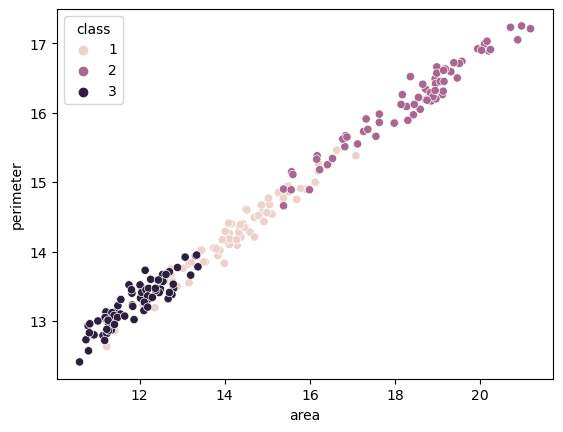

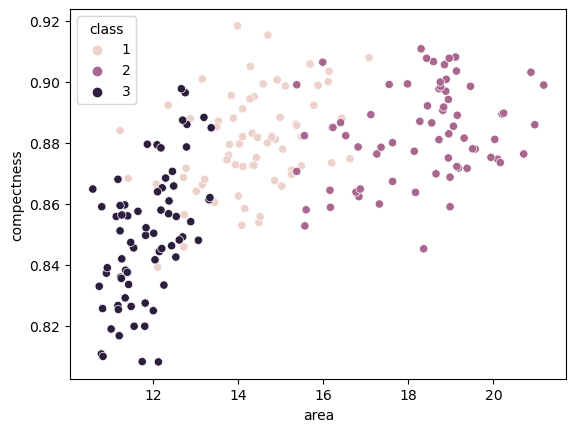

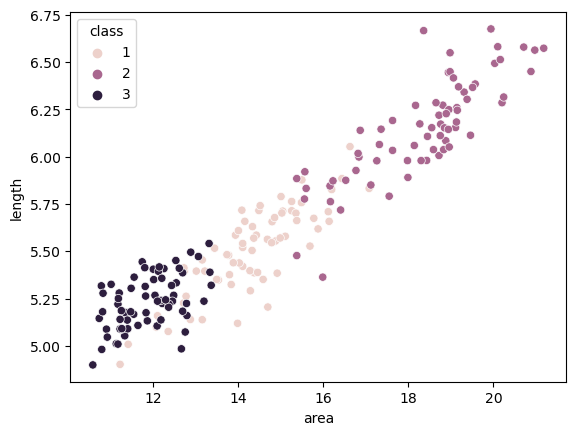

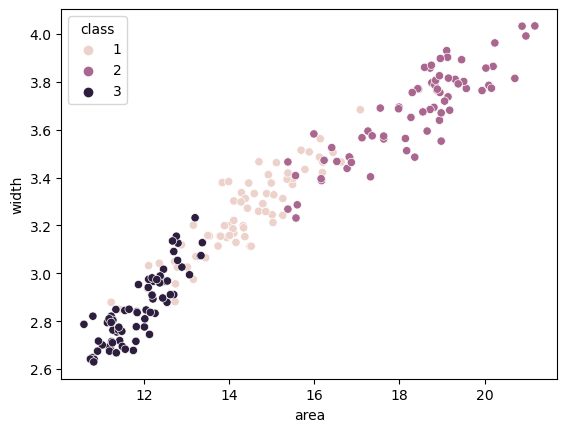

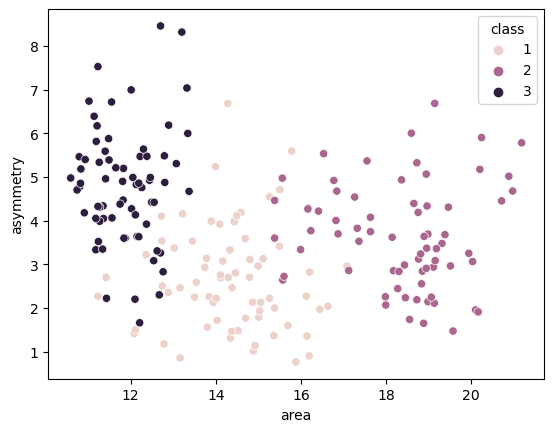

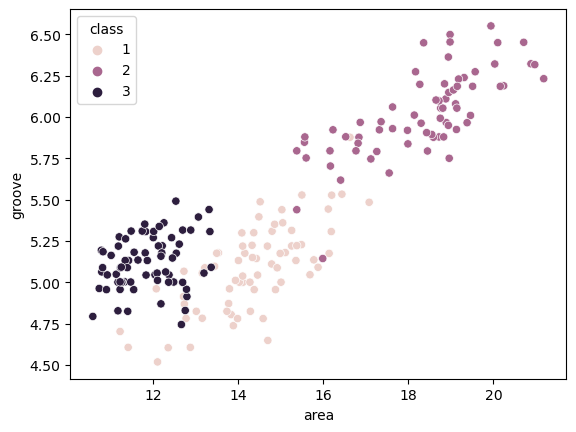

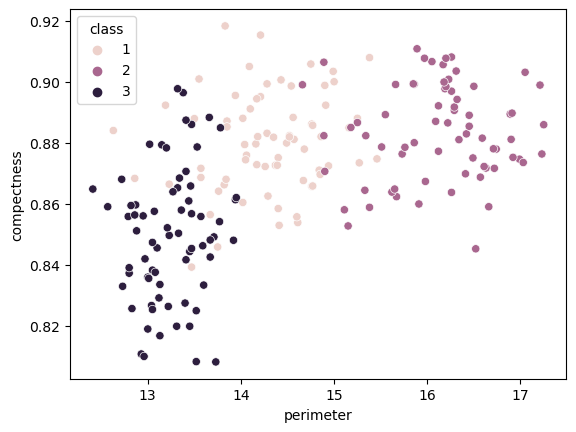

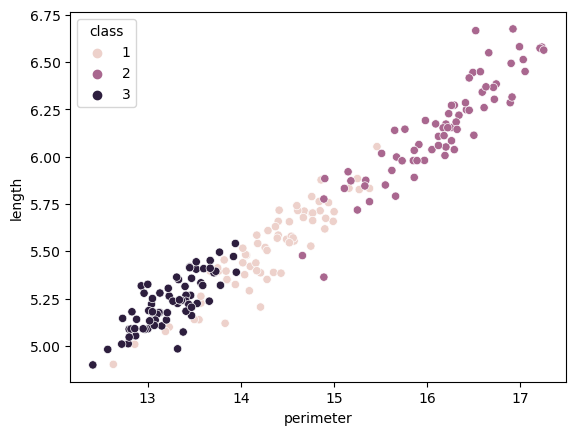

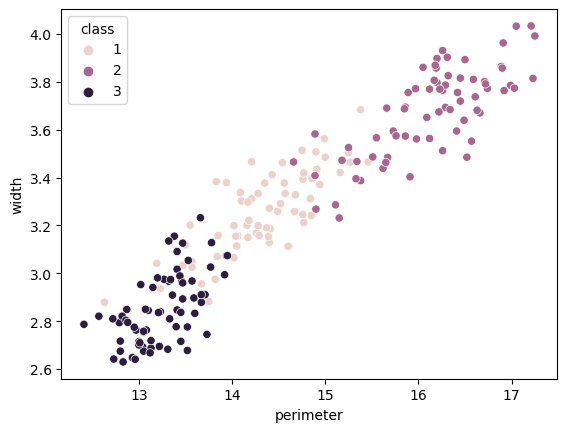

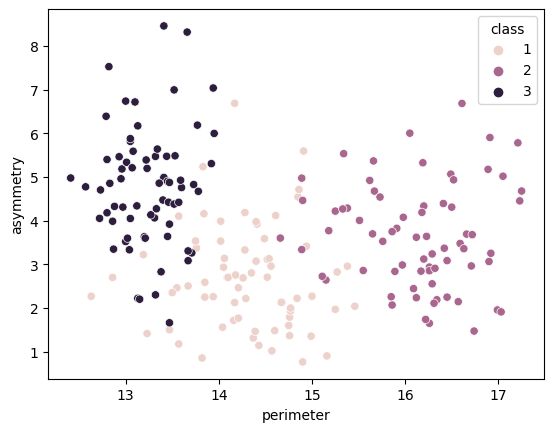

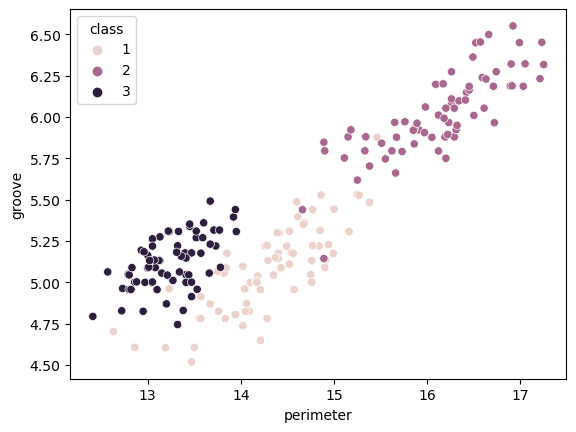

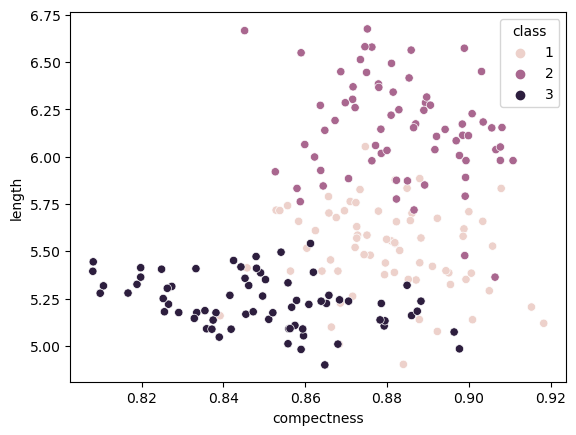

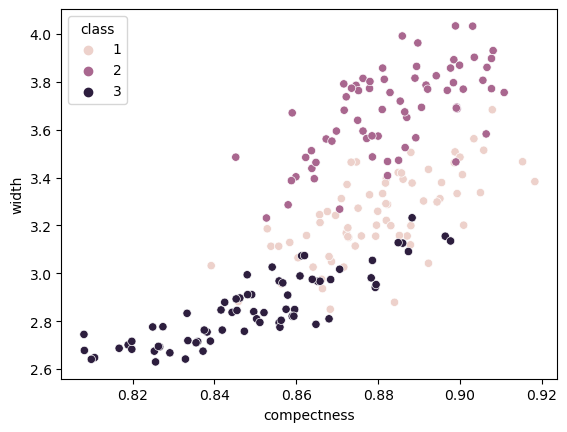

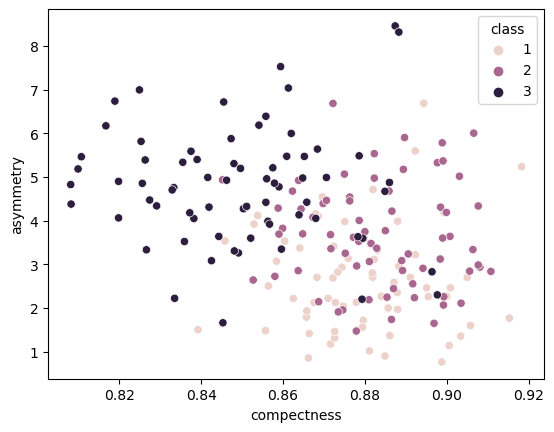

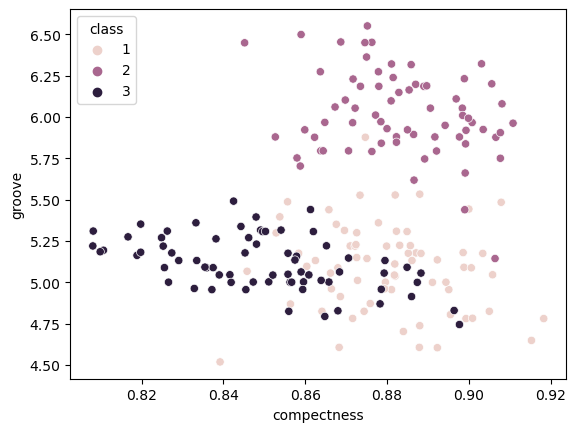

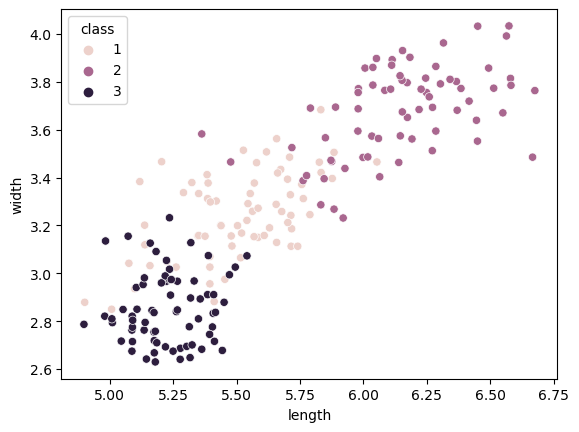

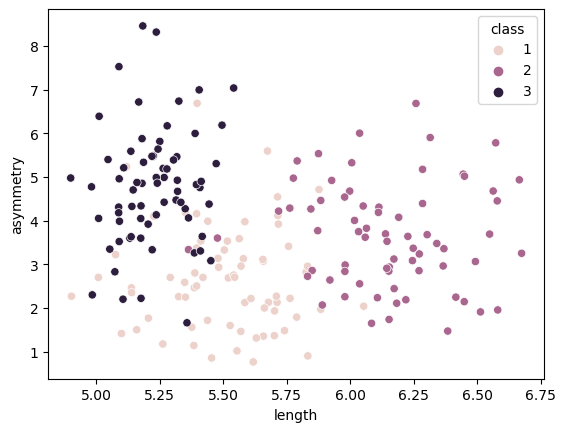

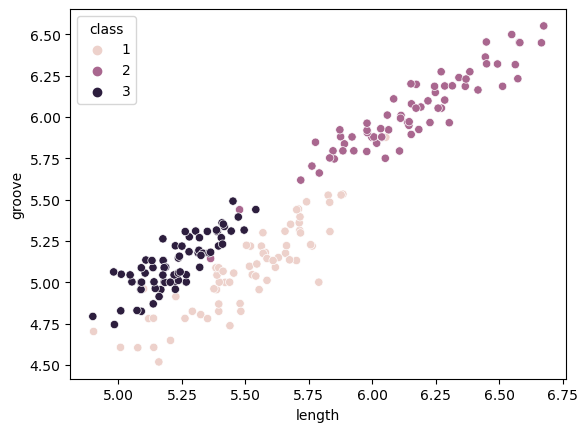

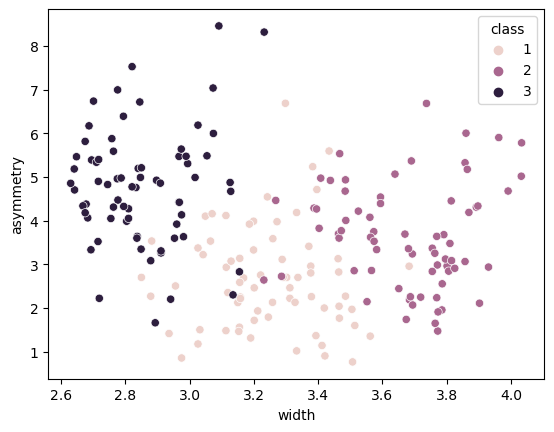

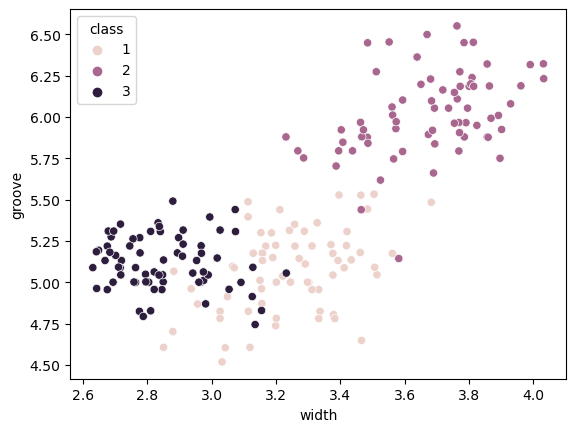

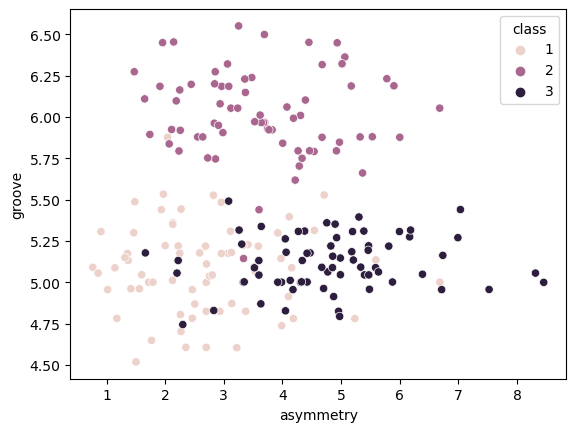

In [9]:
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label,y=y_label,data=df,hue="class")
        plt.show()
         

# Clustering

In [11]:
from sklearn.cluster import KMeans

In [38]:
x = "compectness"
y = "asymmetry"

X = df[[x,y]].values


In [39]:
kmeans_model = KMeans(n_clusters=3)
kmeans = kmeans_model.fit(X)

/home/ashwin/.conda/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
clusters = kmeans.labels_
print(clusters)

[1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 2 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 0 2 1 1 1 0 0 1 1 1 1 1 0 2 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1
 0 2 0 0 2 1 2 2 2 1 1 1 1 0 2 2 1 0 0 2 2 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1
 0 1 2 0 1 0 0 0 0 2 0 0 1 0 0 0 1 1 2 1 1 0 0 2 0 0 1 1 0 2 2 2 2 0 2 1 0
 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 0 2 1 2 0 0 0 2 2 0 2 2 0 2 0 2 1 2 2 2 2 2
 0 2 0 2 2 2 0 0 2 0 2 2 0 0 1 2 1 0 2 0 0 0 2 0 2]


In [41]:
print(df["class"].values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [42]:
# we just have to pap number to different as we r just clustering properties

In [43]:
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns=[x,y,"class"] )

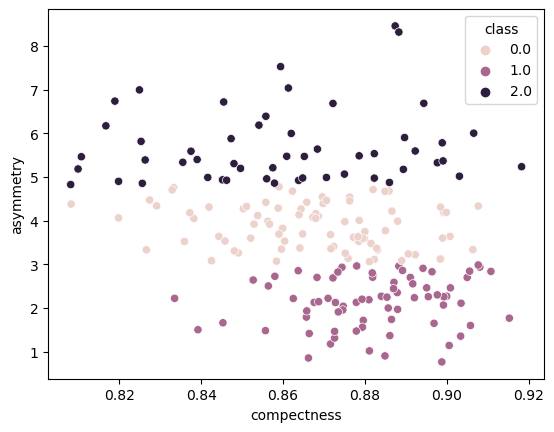

In [44]:
#Kmeans classes
sns.scatterplot(x=x,y=y,hue="class",data=cluster_df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

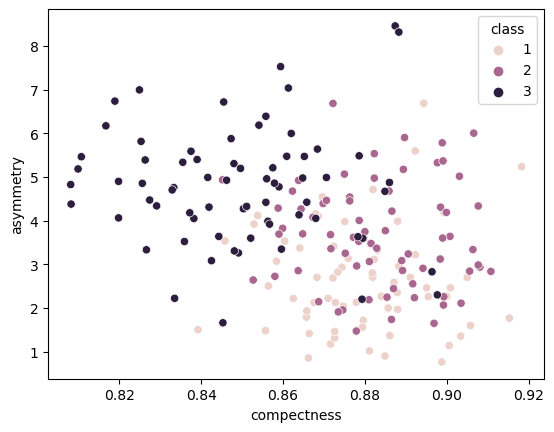

In [45]:
#original 
sns.scatterplot(x=x,y=y,hue="class",data=df)
plt.show

# Higher Dimension


In [55]:
X = df[cols[:-1]].values
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df_m = pd.DataFrame(np.hstack((X,kmeans.labels_.reshape(-1,1)) ),columns=df.columns)

/home/ashwin/.conda/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='compectness', ylabel='asymmetry'>

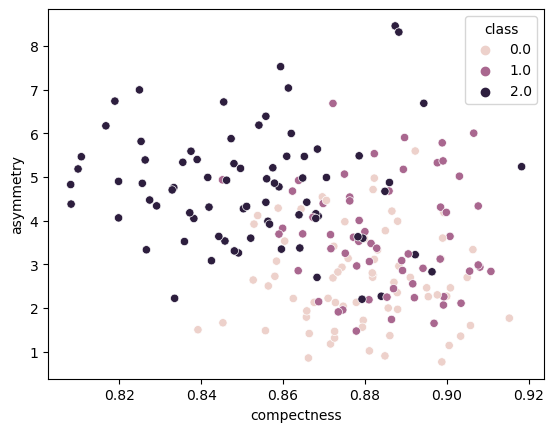

In [56]:
sns.scatterplot(x=x,y=y,hue="class", data=cluster_df_m)

<Axes: xlabel='compectness', ylabel='asymmetry'>

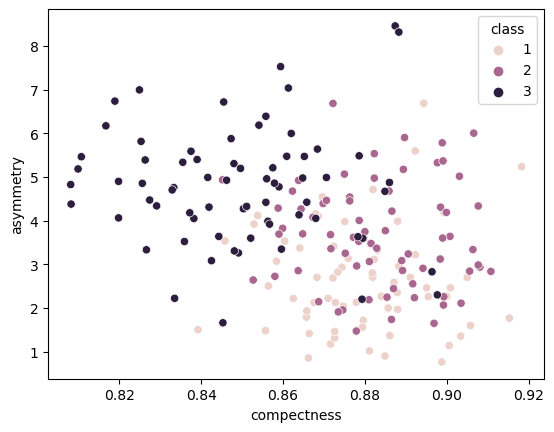

In [57]:
sns.scatterplot(x=x,y=y,hue="class", data=df)

In [58]:
# In higher dimension kemans does have a better prediction


# PCA


In [59]:
from sklearn.decomposition import PCA

In [61]:
pca_model = PCA(n_components=2)
transformed_x = pca_model.fit_transform(X)

In [66]:
X.shape
print(X[:5])

[[15.26   14.84    0.871   5.763   3.312   2.221   5.22  ]
 [14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]
 [14.29   14.09    0.905   5.291   3.337   2.699   4.825 ]
 [13.84   13.94    0.8955  5.324   3.379   2.259   4.805 ]
 [16.14   14.99    0.9034  5.658   3.562   1.355   5.175 ]]


In [65]:
transformed_x.shape
print(transformed_x[:5])

[[ 0.66344838 -1.41732098]
 [ 0.31566651 -2.68922915]
 [-0.6604993  -1.13150635]
 [-1.0552759  -1.62119002]
 [ 1.61999921 -2.18338442]]


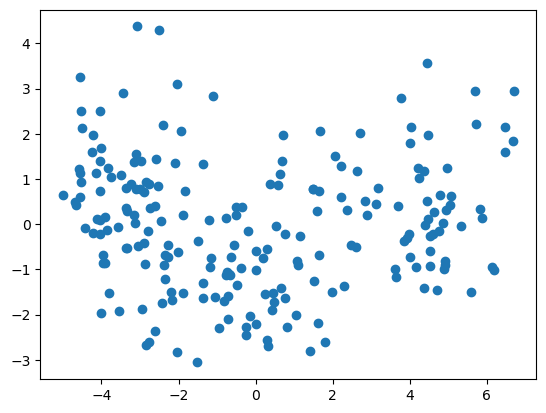

In [68]:
plt.scatter(transformed_x[:,0],transformed_x[:,1])
plt.show()

In [70]:
kmeans_pca_df = pd.DataFrame ( np.hstack((transformed_x,kmeans.labels_.reshape(-1,1))),columns= ["pca1",'pca2','class'] )

In [73]:
truth_pca_df = pd.DataFrame ( np.hstack((transformed_x,df["class"].values.reshape(-1,1))),columns= ["pca1",'pca2','class'] )

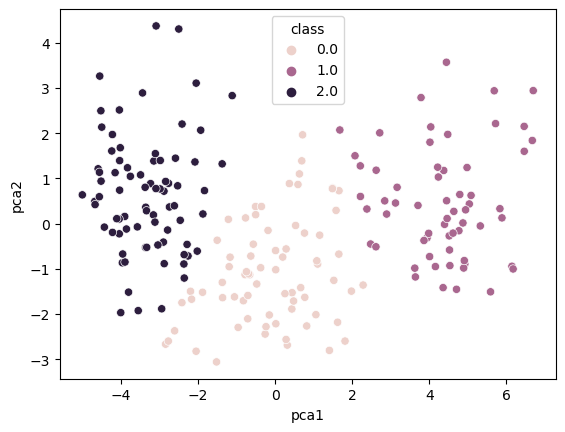

In [74]:
sns.scatterplot(x="pca1",y="pca2",hue="class", data=kmeans_pca_df)
plt.show()

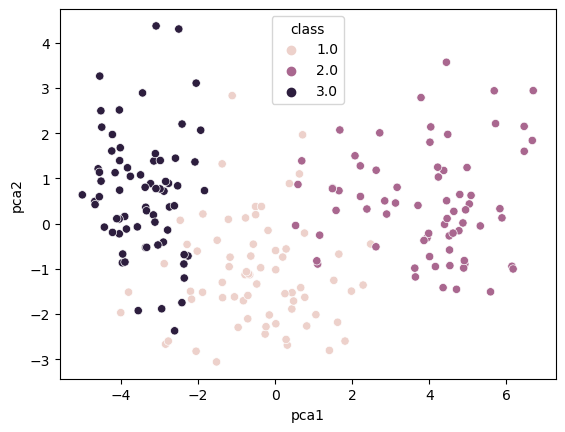

In [75]:
sns.scatterplot(x="pca1",y="pca2",hue="class", data=truth_pca_df)
plt.show()